# Statistical Plots 

# Imports 

In [1]:
#%load_ext autoreload
#%autoreload 2
import os, sys

import sys
sys.path.append('/home/ubuntu/')
os.chdir('/home/ubuntu/')
import importlib
import src
importlib.reload(src)
import src
import src.encoding as enc
import shlex, subprocess
import pandas as pd
from pybedtools import BedTool
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
datapath= "/mnt/data/"
resultspath = "/home/ubuntu/results/"

# Dataset 

In [4]:
#m6A sites filtering for plots --> just original dataset
#dataset containing different statistics on 400 nucleotides

path = f'{datapath}ENCODE/processed/'
directory1 = os.listdir(path)


for folder in directory1: 
    directory2 = os.listdir(f"{path}{folder}")

    for file in directory2 :
        
        if file == 'peaks.crosslink.anno.filt.slop.bed' : 
            subprocess.run(f"bedtools intersect -wb -a {datapath}miCLIP.filt.out.bed \
                                        -b {path}{folder}/{file}  \
                                        > {path}{folder}/{folder}.miclip.filt.bed.out", shell= True)
            

In [5]:
path = f'{datapath}ENCODE/processed/'
data = enc.create_df_statistics(path, 'peaks.crosslink.anno.filt.slop.bed','.miclip.filt.bed.out')

In [7]:
#dataset containing different statistics on 100 nucleotides

path = f'{datapath}ENCODE/processed/'
directory1 = os.listdir(path)

#sloping to 100 nucleotides
for folder in directory1: 
    directory2 = os.listdir(f"{path}{folder}")

    for file in directory2 :
        if file == 'peaks.crosslink.anno.filt.bed' : 
            subprocess.run(f"slopBed -i {path}/{folder}/peaks.crosslink.anno.filt.bed \
                                    -g {datapath}hg38.genome -b 50 \
                                    > {path}/{folder}/peaks.crosslink.anno.filt.slop.hundred", shell= True)

    for file in directory2 :
        if file == 'peaks.crosslink.anno.filt.slop.hundred' : 
            subprocess.run(f"bedtools intersect -wb -a {datapath}miCLIP.filt.out.bed \
                                    -b {path}{folder}/{file}  \
                                    > {path}{folder}/{folder}.miclip.filt.bed.hundred", shell= True)

In [7]:
data_hun = enc.create_df_statistics(path,'peaks.crosslink.anno.filt.slop.hundred','.miclip.filt.bed.hundred')

In [10]:
#dividing the set per cell line
plot_Hep = data[data.RBP.map(lambda x : "HepG2" in x)]
plot_K562 = data[data.RBP.map(lambda x : "K562" in x)]

In [14]:
#sorting relatively to methylation rates
df_sorted_Hep = enc.create_csv_meth_rates(plot_Hep ,3.5, 10,f'{resultspath}methylation_rate_Hep.csv' )
df_sorted_K562 = enc.create_csv_meth_rates(plot_K562 ,3.5, 10,f'{resultspath}methylation_rate_Hep.csv' )

/home/ubuntu/src/encoding.py:121: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_low['methylation'] = 'low'
/home/ubuntu/src/encoding.py:122: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mid['methylation'] = 'medium'
/home/ubuntu/src/encoding.py:123: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.htm

# Plots

/home/ubuntu/src/encoding.py:121: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_low['methylation'] = 'low'
/home/ubuntu/src/encoding.py:122: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mid['methylation'] = 'medium'
/home/ubuntu/src/encoding.py:123: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.htm

<AxesSubplot: xlabel='percentage', ylabel='avgsite'>

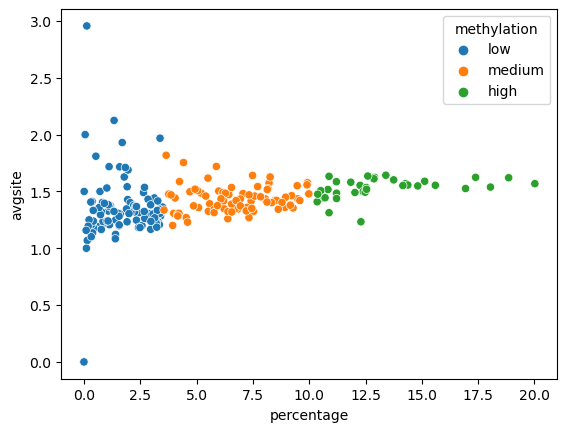

In [8]:

#plot methylation rate over 400 nucleotides
df_sorted = enc.create_csv_meth_rates(data ,3.5, 10,f'{resultspath}methylation_rate.csv' )
sns.scatterplot(data=df_sorted, x="percentage", y="avgsite", hue="methylation")

/home/ubuntu/src/encoding.py:121: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_low['methylation'] = 'low'
/home/ubuntu/src/encoding.py:122: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mid['methylation'] = 'medium'
/home/ubuntu/src/encoding.py:123: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.htm

<AxesSubplot: xlabel='percentage', ylabel='avgsite'>

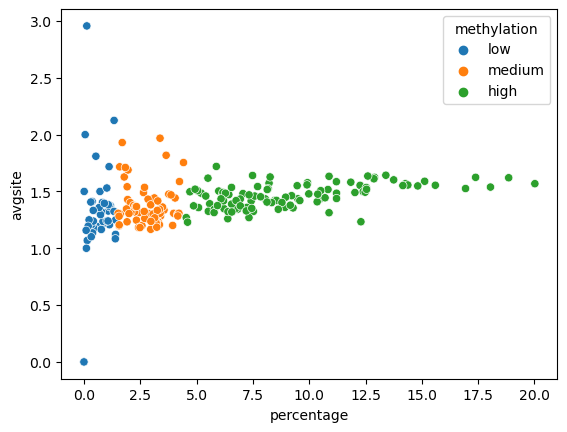

In [9]:
#plot methylation rate on 100 nucleotides

df_sorted_hun = enc.create_csv_meth_rates(data ,1.5, 4.5,f'{resultspath}methylation_rate_100_nts.csv' )
sns.scatterplot(data=df_sorted_hun,x="percentage", y="avgsite", hue="methylation")

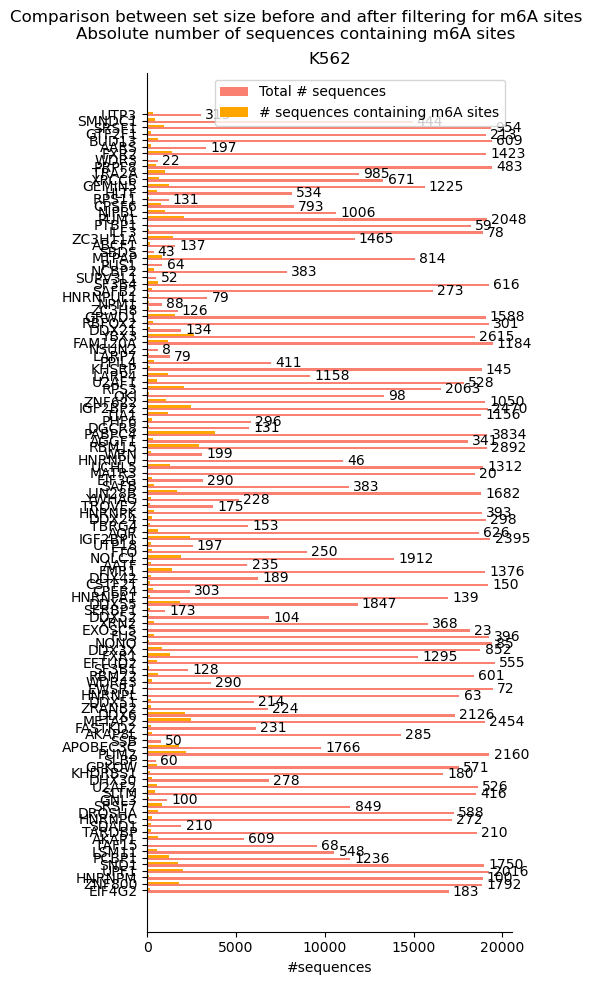

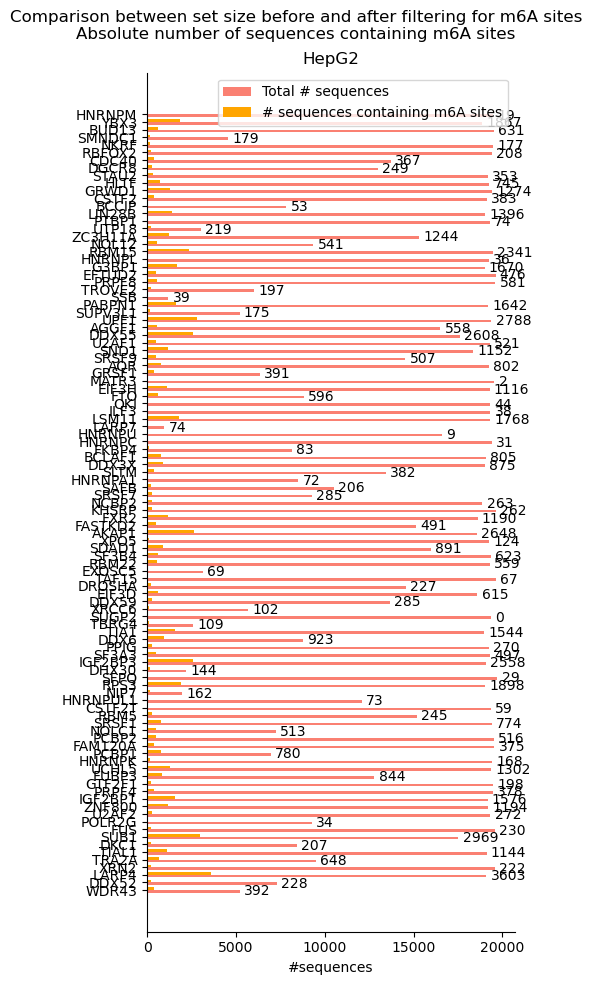

In [12]:
#Comparison between set size before and after filtering for m6A sites

#K562
figK,axK = enc.plot_comparison_m6a_original(plot_K562, 'K562')  
plt.savefig(f'{resultspath}Comparison_before_after_m6A_sites_abs_K562.png', bbox_inches='tight')

#Hep
fig, ax = enc.plot_comparison_m6a_original(plot_Hep, 'HepG2')
plt.savefig(f'{resultspath}Comparison_before_after_m6A_sites_abs__abs_HepG2.png', bbox_inches='tight')

plt.show()


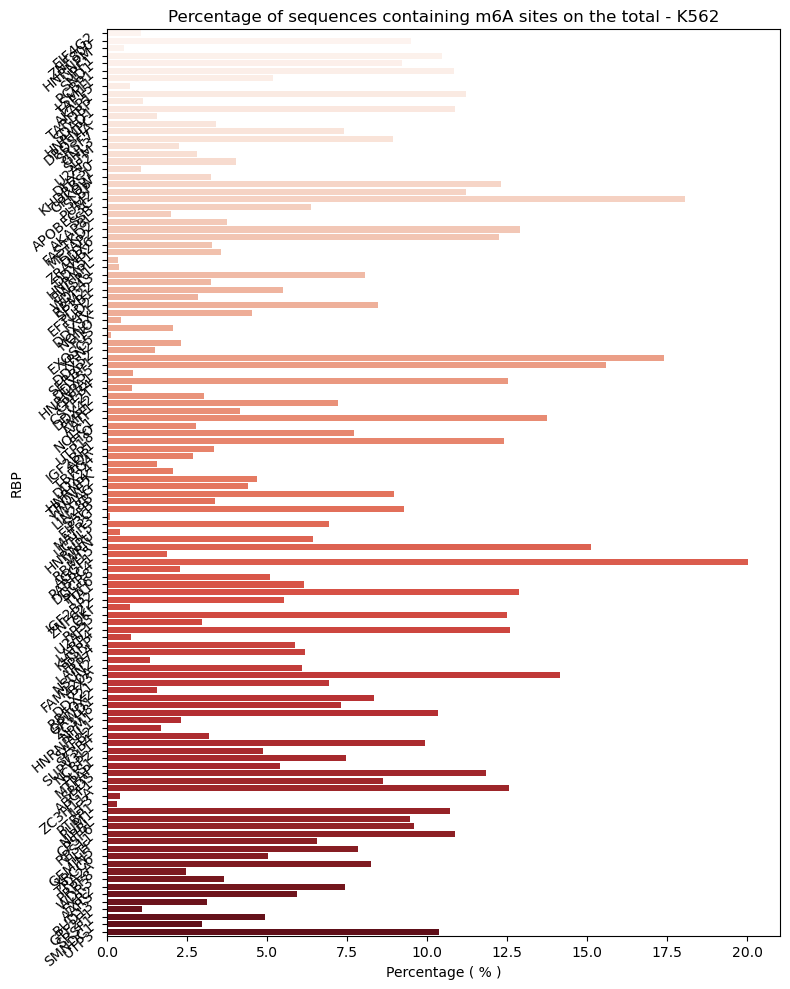

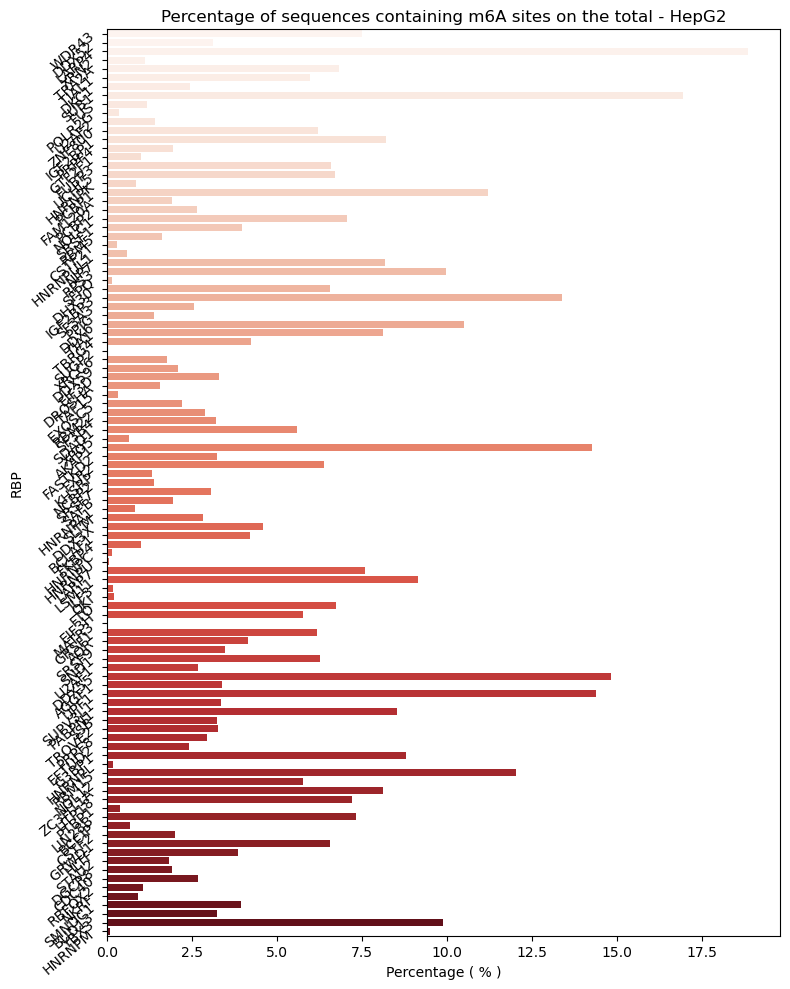

In [13]:
#plotting percentage of sequences containing at least one m6A site on the total number of sequences
plt_K562 = enc.plot_percentage(plot_K562,'K562')
plt_K562.show()

plt_Hep = enc.plot_percentage(plot_Hep,'HepG2')
plt_Hep.show()


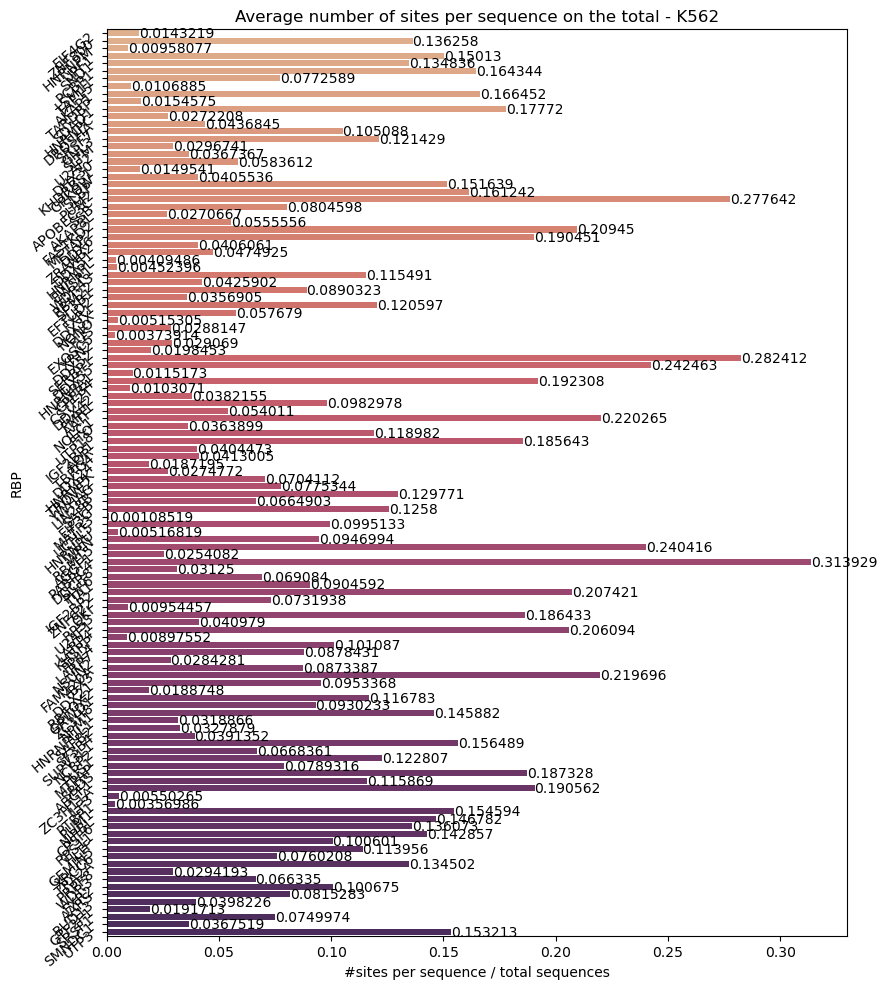

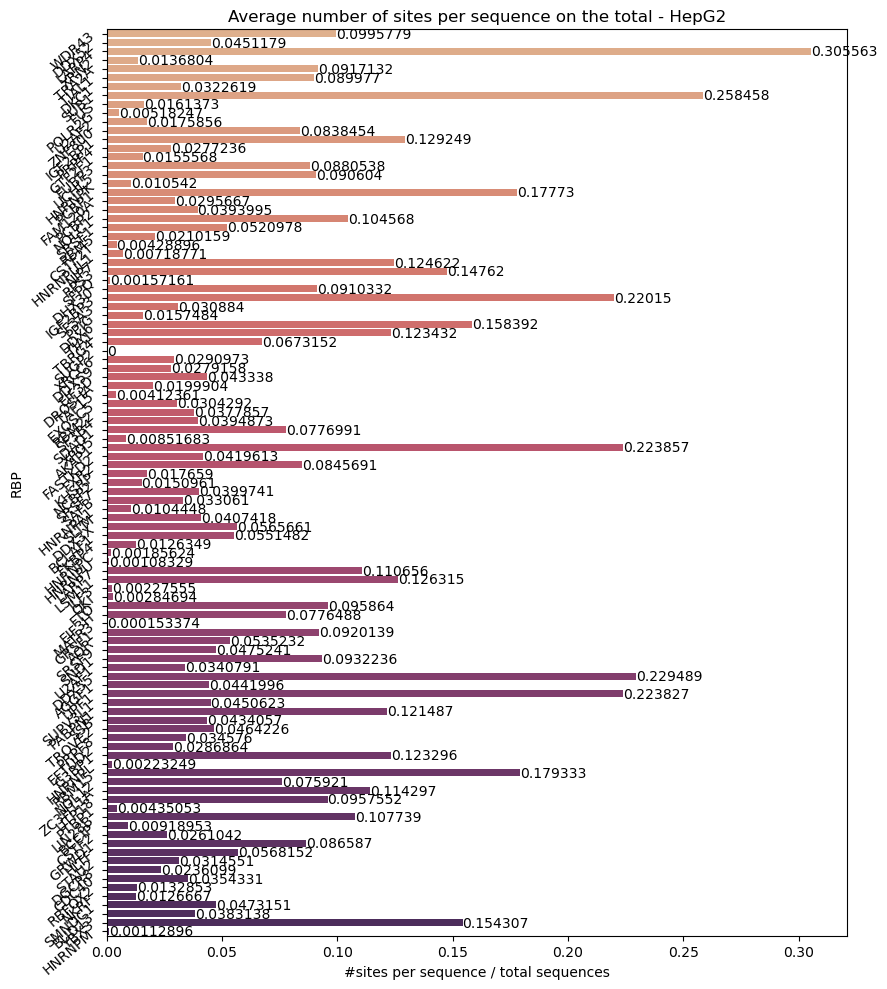

'\nmy_pal = "flare"\n\nplt.figure(figsize=(9,10))\nax = sns.barplot(data=plot_ds_K562, x="avgsitesxtotal", y=labelsK, palette = my_pal)\nax.set_yticklabels(ax.get_yticklabels(), rotation=40, ha="right")\nplt.title(\'Average number of sites per sequence on the total - K562\')\nfor i in ax.containers:\n    ax.bar_label(i,)\nax.set_xlabel(\'#sites per sequence / total sequences\')\nplt.tight_layout()\nplt.show()\n\nplt.figure(figsize=(8,10))\nax = sns.barplot(data=plot_ds_Hep, x="avgsitesxtotal", y=labels, palette = my_pal)\nax.set_yticklabels(ax.get_yticklabels(), rotation=40, ha="right")\nplt.title(\'Average number of sites per sequence on the total - HepG2\')\nfor i in ax.containers:\n    ax.bar_label(i,)\nax.set_xlabel(\'#sites per sequence / total sequences\')\nplt.tight_layout()\nplt.show()'

In [7]:

#plotting the average number of sites per sequence on the total number of sequences
plt_K562 = enc.plot_avgsitextotal(plot_K562,'K562')
plt_K562.show()

plt_Hep = enc.plot_avgsitextotal(plot_Hep,'HepG2')
plt_Hep.show()


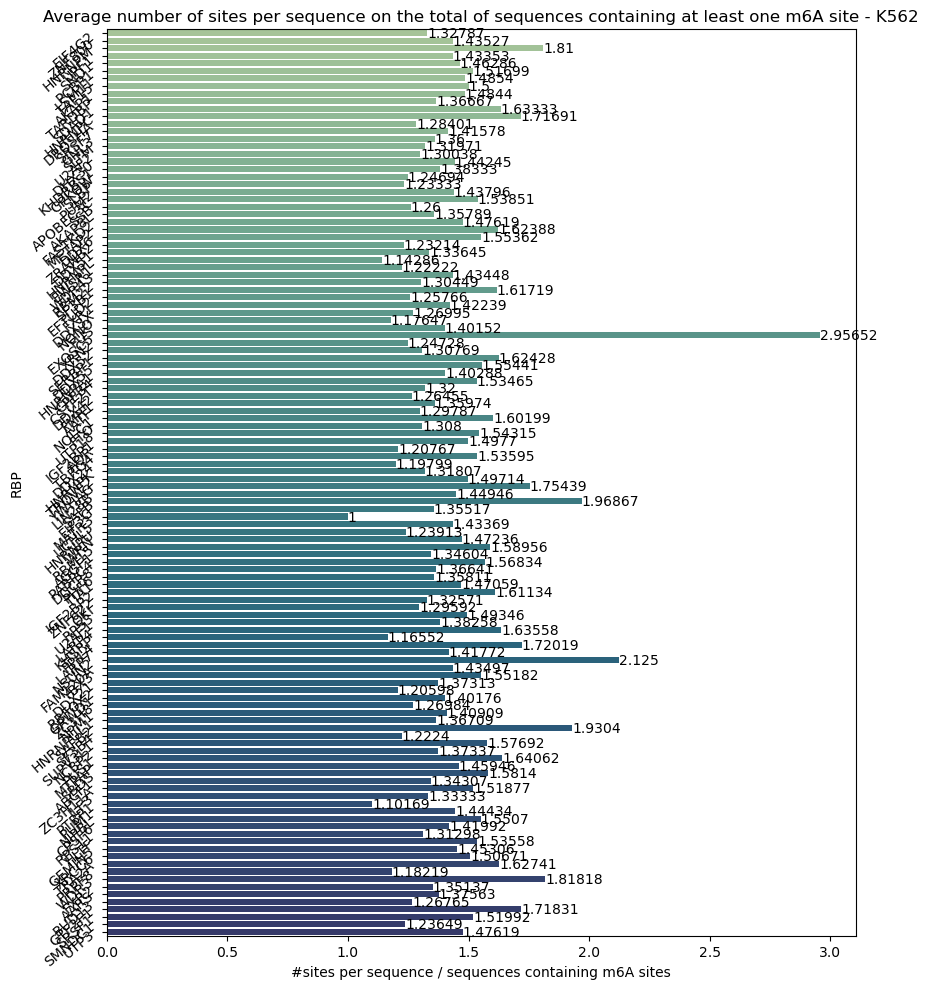

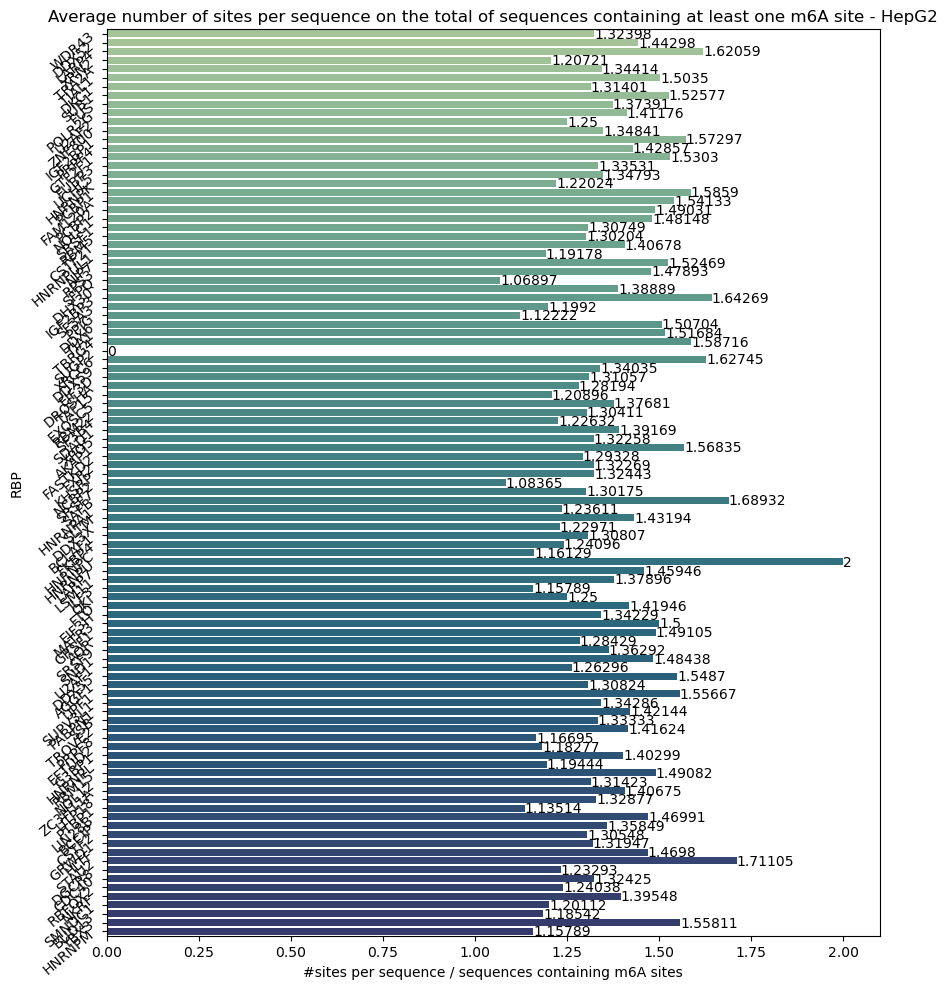

'\nmy_pal = "crest"\n\nplt.figure(figsize=(9,10))\nax = sns.barplot(data=plot_ds_K562, x="avgsite", y=labelsK, palette = my_pal)\nax.set_yticklabels(ax.get_yticklabels(), rotation=40, ha="right")\nplt.title(\'Average number of sites per sequence on the total of sequences containing at least one m6A site - K562\')\nfor i in ax.containers:\n    ax.bar_label(i,)\nax.set_xlabel(\'#sites per sequence / sequences containing m6A sites\')\nplt.tight_layout()\nplt.show()\n\nplt.figure(figsize=(8,10))\nax = sns.barplot(data=plot_ds_Hep, x="avgsite", y=labels, palette = my_pal)\nax.set_yticklabels(ax.get_yticklabels(), rotation=40, ha="right")\nplt.title(\'Average number of sites per sequence on the total of sequences containing at least one m6A site - HepG2\')\nfor i in ax.containers:\n    ax.bar_label(i,)\nax.set_xlabel(\'#sites per sequence / sequences containing m6A sites\')\nplt.tight_layout()\nplt.show()'

In [8]:
#plotting the average number of sites per sequence on the total of sequences containing at least one m6A site 
plt_K562 = enc.plot_avgsite(plot_K562,'K562')
plt_K562.show()

plt_Hep = enc.plot_avgsite(plot_Hep,'HepG2')
plt_Hep.show()


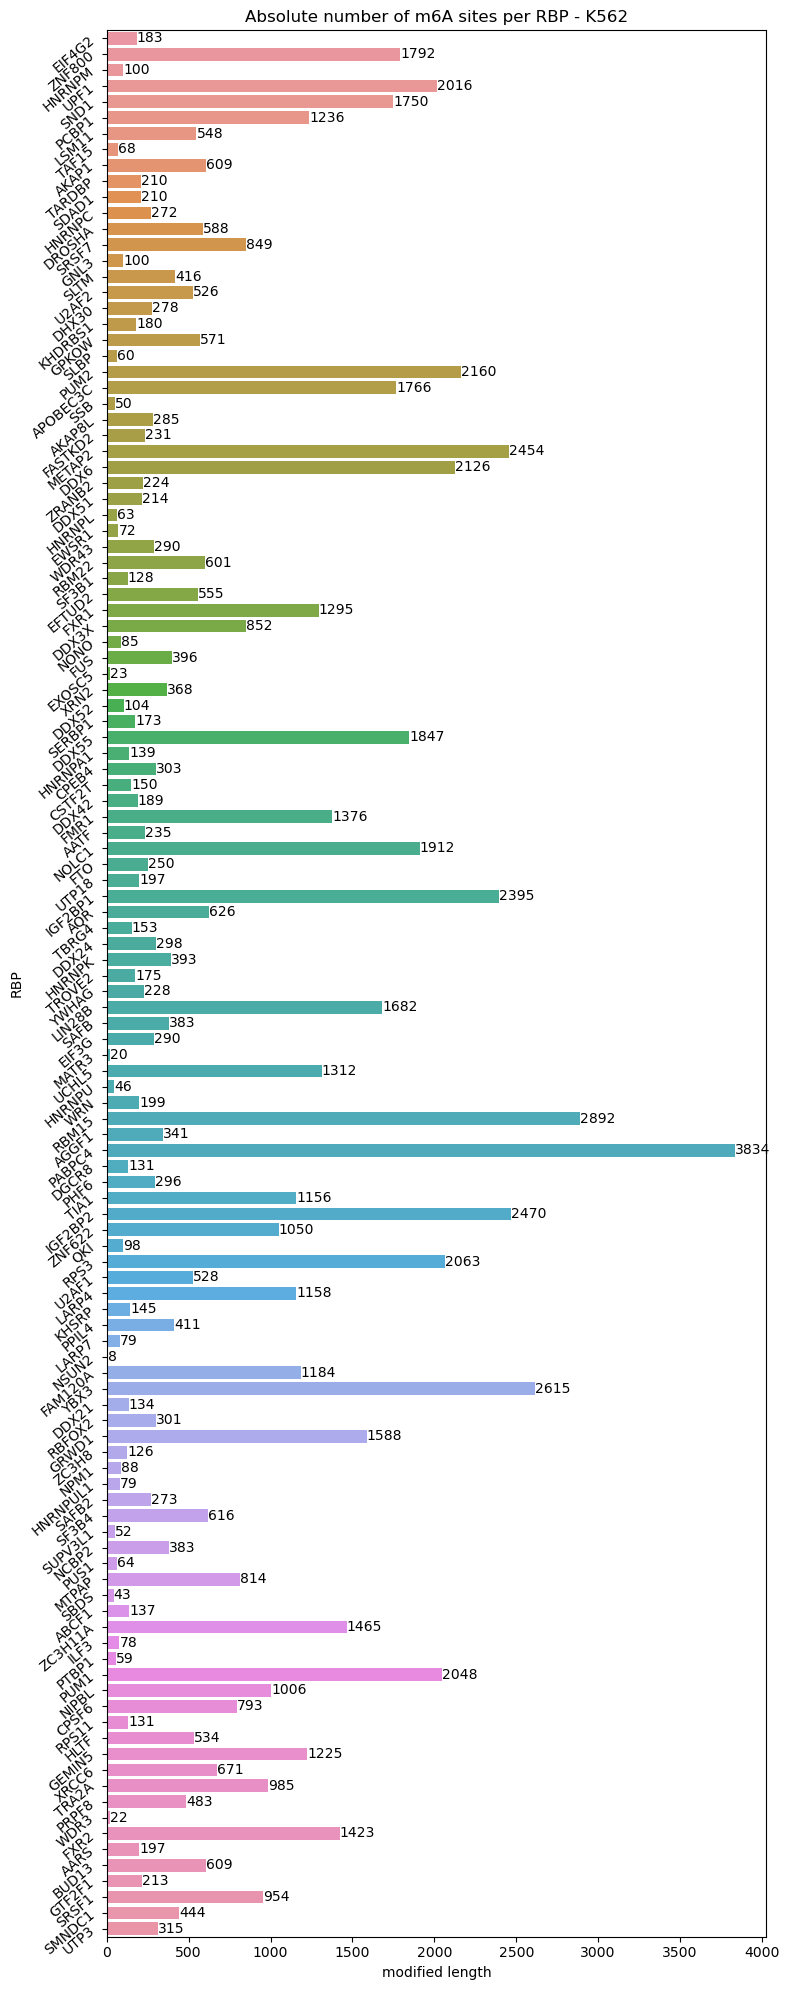

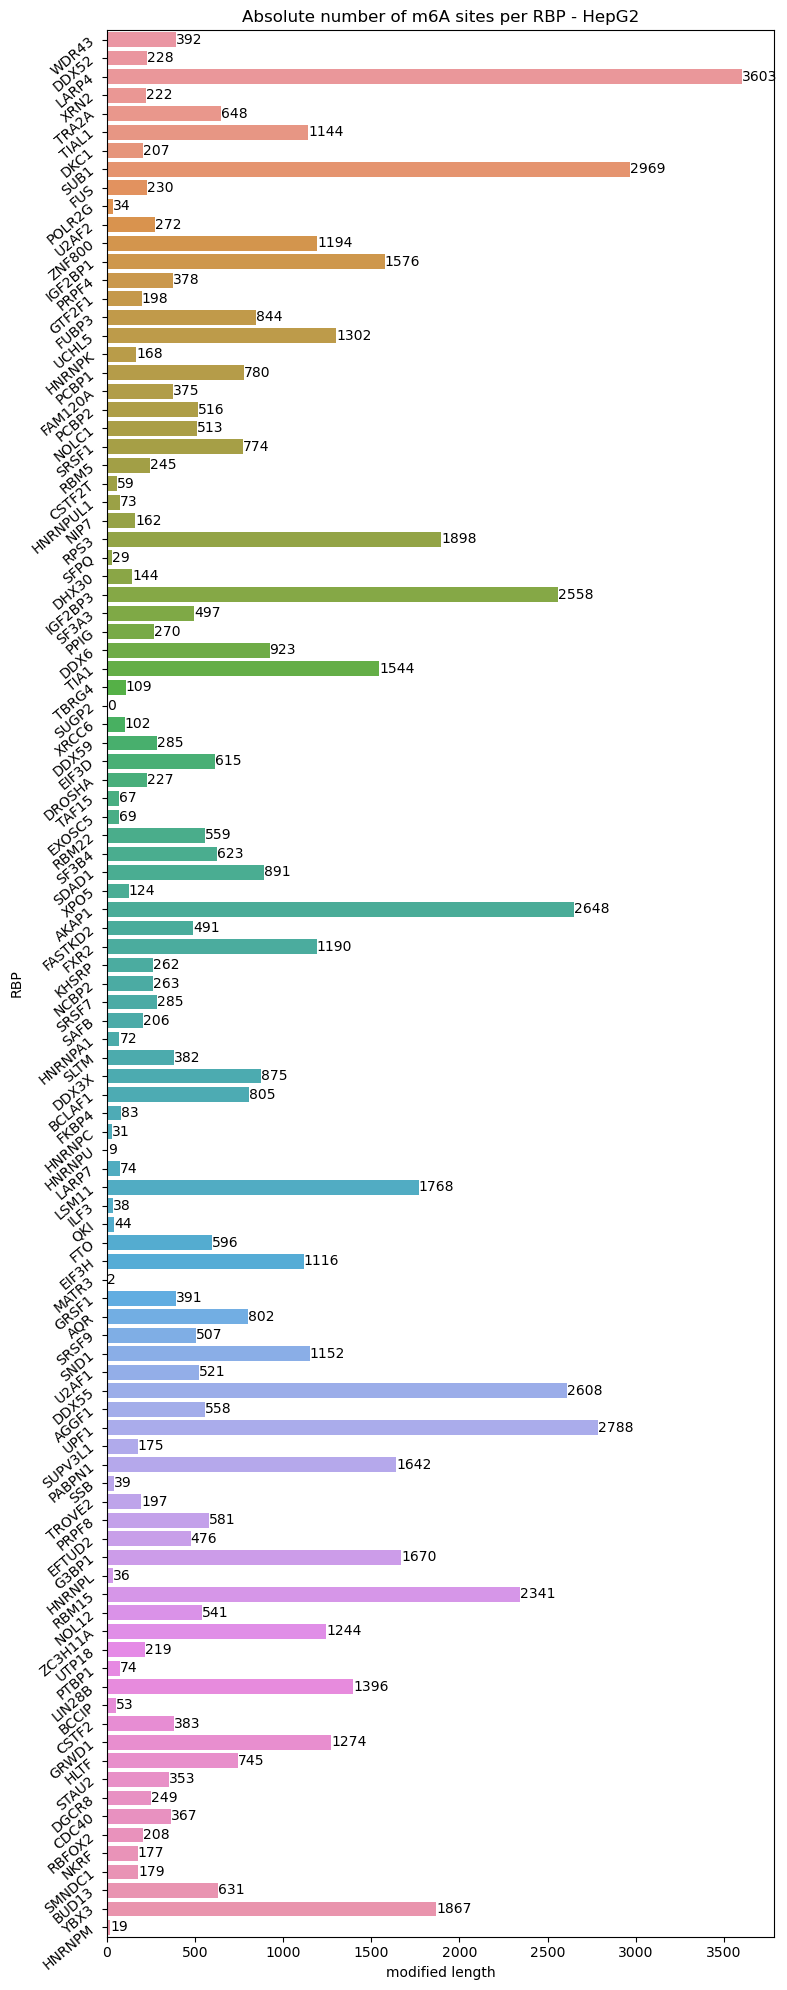

'\nplt.figure(figsize=(8,20))\nax = sns.boxplot(data=plot_ds_K562, x="modified length", y=labelsK)\nax.set_yticklabels(ax.get_yticklabels(), rotation=40, ha="right")\nplt.title(\'Absolute number of m6A sites per RBP - K562\')\nplt.tight_layout()\nplt.show()\n\nplt.figure(figsize=(8,20))\nax = sns.boxplot(data=plot_ds_Hep, x=\'modified length\', y=labels)\nax.set_yticklabels(ax.get_yticklabels(), rotation=40, ha="right")\nplt.title(\'Absolute number of m6A sites per RBP - HepG2\')\nplt.tight_layout()\nplt.show()'

In [6]:
#plotting the absolute number of m6A sites per RBP set  
plt_K562 = enc.plot_absm6a(plot_K562,'K562')
plt_K562.show()

plt_Hep = enc.plot_absm6a(plot_Hep,'HepG2')
plt_Hep.show()


Text(0, 0.5, 'absolute number of m6A sites')

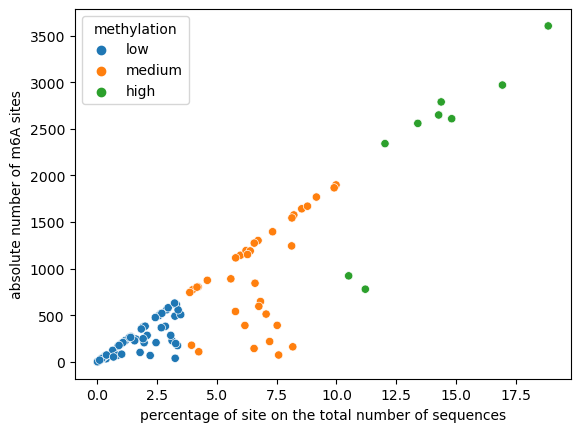

In [15]:
#plot absolute number of m6A sites on the percentage of sites per total number of sequences
#HepG2
ax = sns.scatterplot(data=df_sorted_Hep, x="percentage", y="modified length", hue="methylation")
ax.set_xlabel('percentage of site on the total number of sequences')
ax.set_ylabel('absolute number of m6A sites')


Text(0, 0.5, 'absolute number of m6A sites')

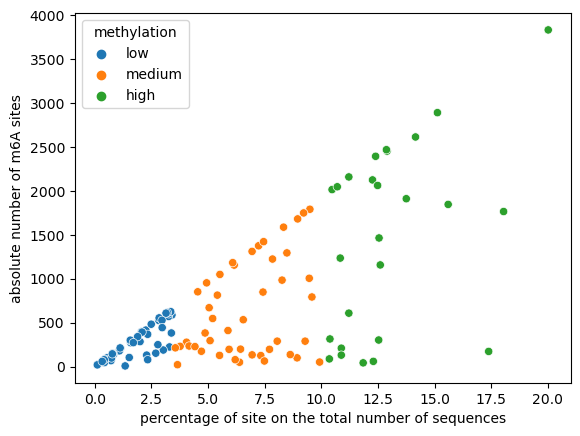

In [16]:
#K562
ax2 = sns.scatterplot(data=df_sorted_K562, x="percentage", y="modified length", hue="methylation")
ax2.set_xlabel('percentage of site on the total number of sequences')
ax2.set_ylabel('absolute number of m6A sites')


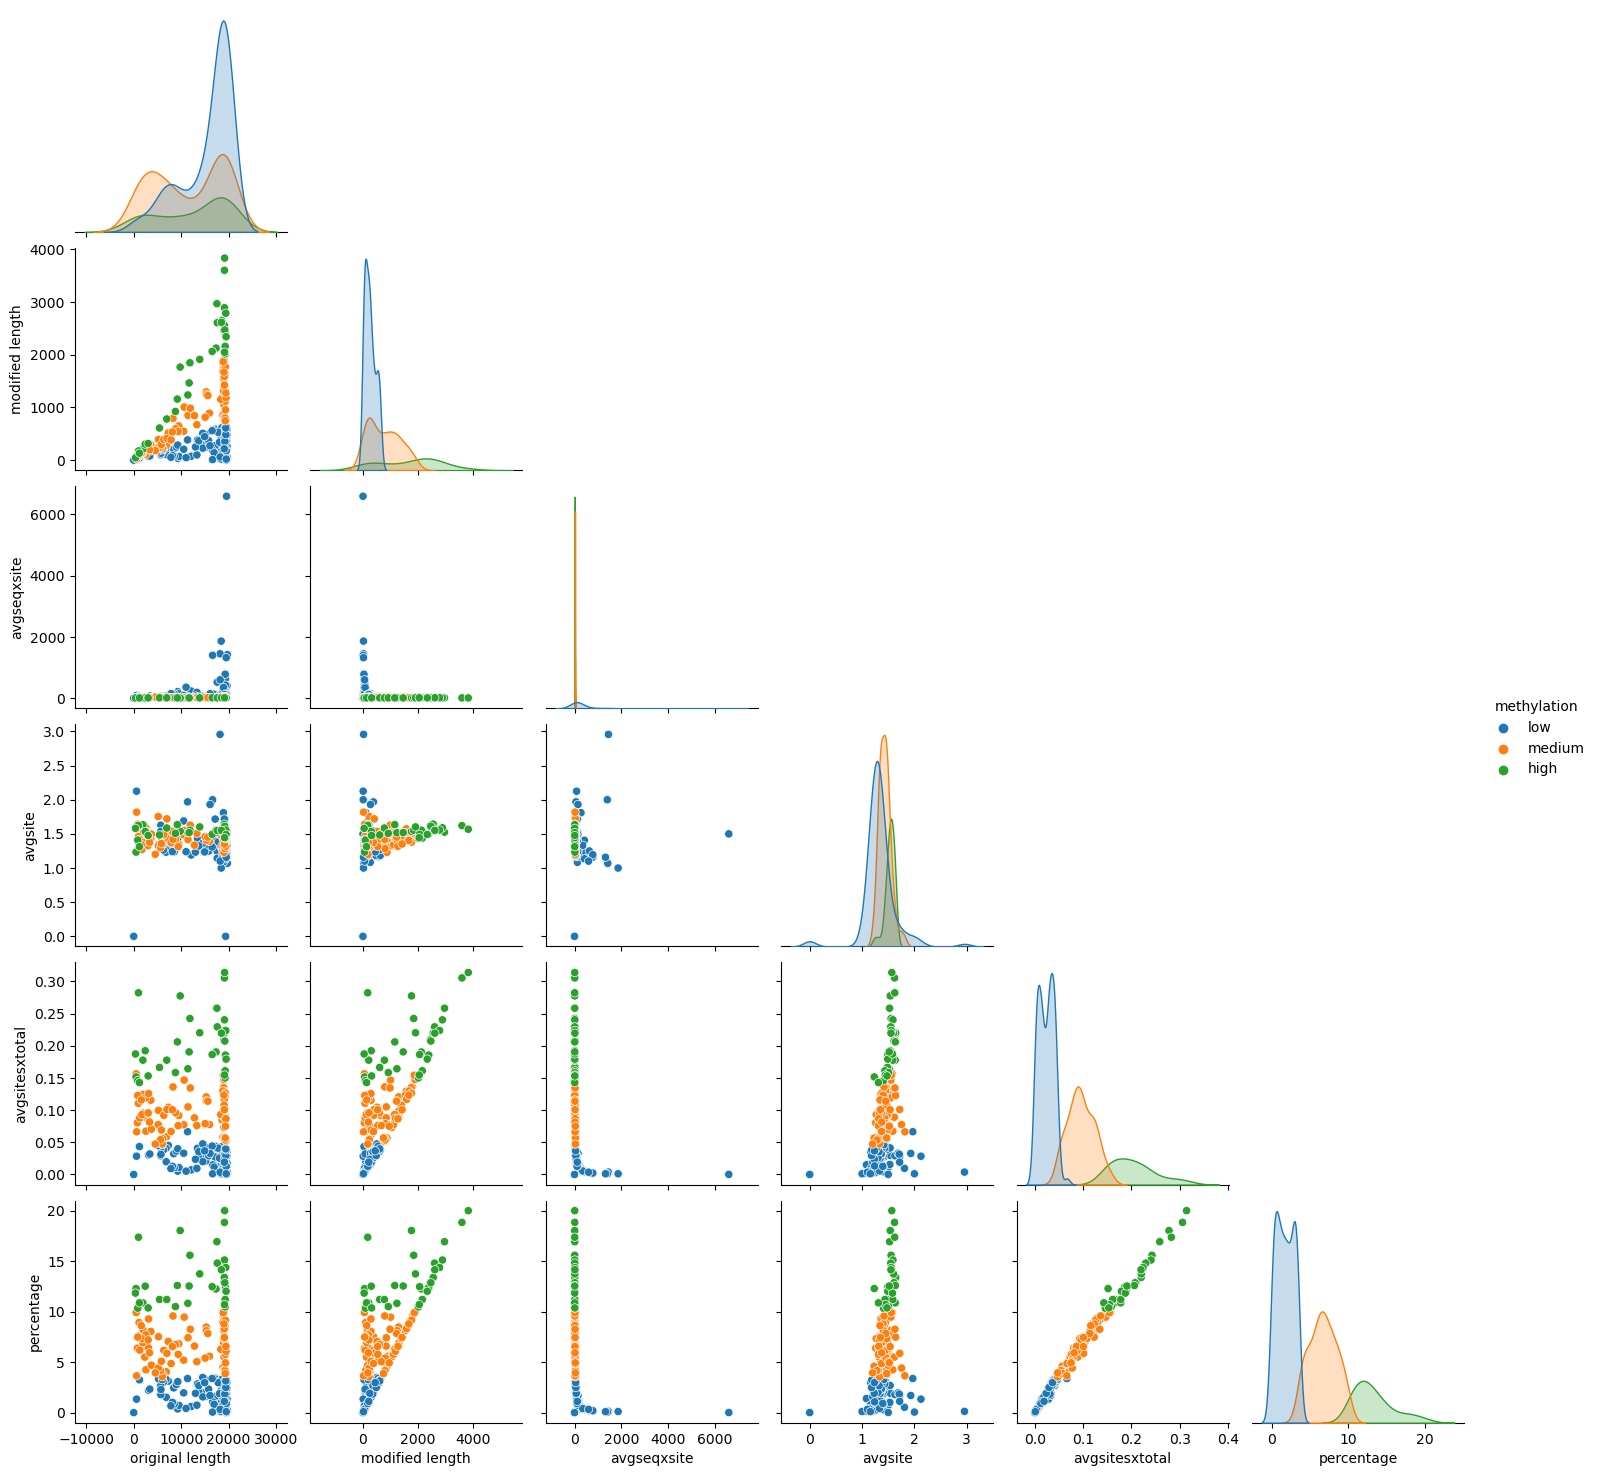

In [17]:
#check if it makes sense, for both cell lines together
sns_plot = sns.pairplot(df_sorted, hue='methylation', height=2.5, corner=True)

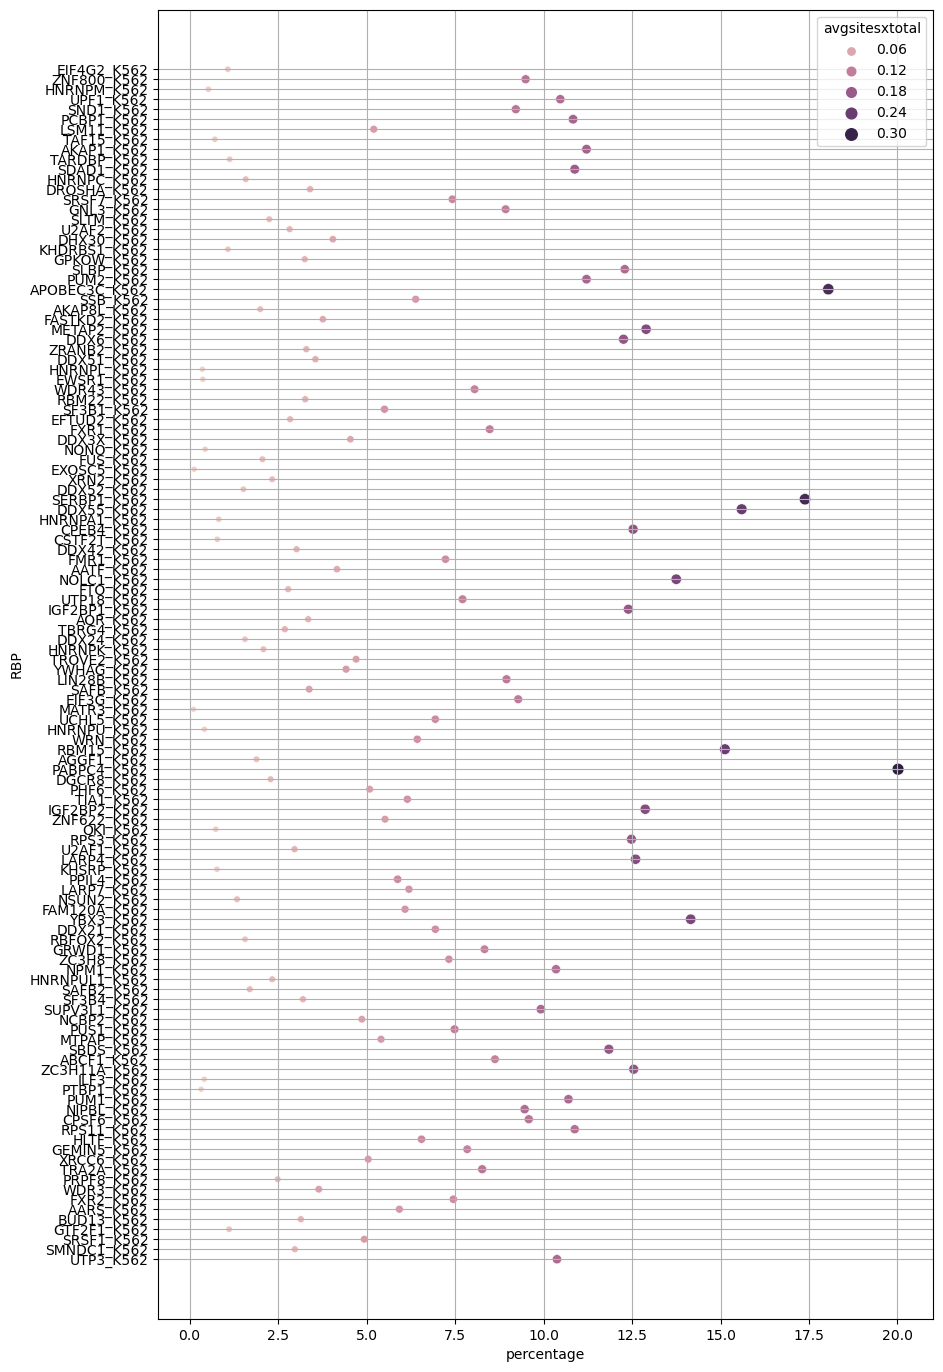

In [19]:
plt.figure(figsize=(10, 17))
ax = sns.scatterplot(data=plot_K562, x="percentage", y="RBP", hue='avgsitesxtotal', size ='avgsitesxtotal' )
plt.grid()
plt.show()